<a id = "top"></a>
# Additional Modeling

<a id="home"></a>

---
This notebook is about better modeling for kaggle submissions. This whole notebook ended up being a waste of time.

#### Other Notebooks

- [Cleaning and EDA](cleaning_and_EDA.ipynb)
- [Modeling](modeling.ipynb)
- [Presentation Prep](presentation_prep.ipynb)

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer, StandardScaler, PolynomialFeatures

%matplotlib inline

In [354]:
# Importing the enhanced dataset as ames
ames = pd.read_csv("../datasets/ames_plus.csv")
ames_test = pd.read_csv("../datasets/ames_test.csv")

In [355]:
ames.head()

,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,...,sale_type_WD,ms_subclass,roof_matl_Metal,roof_matl_Roll,exterior_1st_PreCast,exterior_2nd_Other,exterior_2nd_PreCast,mas_vnr_type_CBlock,heating_Floor,sale_type_VWD
0,68.0,13517,2,3,2,6,8,289.0,4,3,...,1,0,0,0,0,0,0,0,0,0
1,43.0,11492,2,3,2,7,5,132.0,4,3,...,1,0,0,0,0,0,0,0,0,0
2,68.0,7922,3,3,2,5,7,0.0,3,4,...,1,0,0,0,0,0,0,0,0,0
3,73.0,9802,3,3,2,5,5,0.0,3,3,...,1,0,0,0,0,0,0,0,0,0
4,82.0,14235,2,3,2,6,8,0.0,3,3,...,1,0,0,0,0,0,0,0,0,0


In [356]:
features = list(ames.columns.drop("saleprice"))

ames[features].isna().sum().sum()

0

In [357]:
X = ames[features]
y = ames["saleprice"]

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state = 35, 
                                                    test_size = 0.25)

In [359]:
# Feature preprocessing

pt_X = PowerTransformer()
pt_X.fit(X_train)
X_train = pt_X.transform(X_train)
X_test = pt_X.transform(X_test)

pt_y = PowerTransformer()
pt_y.fit(y_train.to_frame()) 
y_train = pt_y.transform(y_train.to_frame())
y_test = pt_y.transform(y_test.to_frame())

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:2798: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [360]:
ss = StandardScaler()

ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [361]:
# Linear regression

mlr_model = LinearRegression()
mlr_model.fit(X_train_scaled, y_train)

cross_val_score(mlr_model, X_train_scaled, y_train, cv = 5).mean()

-2.416147561458674e+23

In [362]:
# Ridge regression

ridge = RidgeCV(alphas = np.logspace(0, 5, 100), scoring = "r2", cv = 5)
ridge = ridge.fit(X_train_scaled, y_train)

ridge_model = Ridge(alpha = ridge.alpha_)
ridge_model.fit(X_train_scaled, y_train)

cross_val_score(ridge_model, X_train_scaled, y_train, cv = 5).mean()

0.9175444398667467

In [363]:
# Lasso regression

lasso = LassoCV(cv = 5)
lasso = lasso.fit(X_train_scaled, y_train)

lasso_model = Lasso(alpha = lasso.alpha_)
lasso_model.fit(X_train_scaled, y_train)

cross_val_score(lasso_model, X_train_scaled, y_train, cv = 5).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9208750675900138

In [364]:
# ElasticNet regression

enet_alphas = np.linspace(0.1, 1.0, 100)
enet_ratio = np.linspace(0.1, 1.0, 100)

enet = ElasticNetCV(alphas = enet_alphas, l1_ratio = enet_ratio, cv = 5)
enet.fit(X_train_scaled, y_train)

print(enet.alpha_)
print(enet.l1_ratio_)

enet_model = ElasticNet(alpha = enet.alpha_, l1_ratio = enet.l1_ratio_)
enet_model.fit(X_train_scaled, y_train)

cross_val_score(enet_model, X_train_scaled, y_train, cv = 5).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1
0.1


0.918679354154922

In [365]:
print(f"Linear: {cross_val_score(mlr_model, X_train_scaled, y_train, cv = 5).mean()}")

print(f"Ridge: {cross_val_score(ridge_model, X_train_scaled, y_train, cv = 5).mean()}")

print(f"Lasso: {cross_val_score(lasso_model, X_train_scaled, y_train, cv = 5).mean()}")

print(f"ElasticNet: {cross_val_score(enet_model, X_train_scaled, y_train, cv = 5).mean()}")

Linear: -2.416147561458674e+23
Ridge: 0.9175444398667467
Lasso: 0.9208750675900138
ElasticNet: 0.918679354154922


In [366]:
print(f"Linear: {cross_val_score(mlr_model, X_test_scaled, y_test, cv = 5).mean()}")

print(f"Ridge: {cross_val_score(ridge_model, X_test_scaled, y_test, cv = 5).mean()}")

print(f"Lasso: {cross_val_score(lasso_model, X_test_scaled, y_test, cv = 5).mean()}")

print(f"ElasticNet: {cross_val_score(enet_model, X_test_scaled, y_test, cv = 5).mean()}")

Linear: -2.558515331084935e+24
Ridge: 0.8632853471728955
Lasso: 0.8210557827207055
ElasticNet: 0.8565181659533894


In [367]:
print(f"Linear: {mlr_model.score(X_test_scaled, y_test)}")

print(f"Ridge: {ridge_model.score(X_test_scaled, y_test)}")

print(f"Lasso: {lasso_model.score(X_test_scaled, y_test)}")

print(f"ElasticNet: {enet_model.score(X_test_scaled, y_test)}")

Linear: -2.8492414847417624e+21
Ridge: 0.9059544952370429
Lasso: 0.9089605981024389
ElasticNet: 0.9109817686979281


In [368]:
submission = pd.DataFrame()
submission["Id"] = ames_test["id"]

ames_test[features].isna().sum().sum()

0

In [369]:
test_X = ames_test[features]
test_X = pt_X.transform(test_X)
test_X = ss.transform(test_X)

predictions = lasso_model.predict(test_X)

submission["SalePrice"] = pt_y.inverse_transform(predictions.reshape(-1,1))

submission.head()

,Id,SalePrice
0,2658,130499.436423
1,2718,155817.923901
2,2414,229563.512171
3,1989,101108.093828
4,625,171214.149553


In [370]:
submission.to_csv("../datasets/submissions/submission_5.csv", index = False)

> MSE, as calculated by Kaggle: 39215.62850. Higher variance than in other models, likely due to the over 200 features. It seems that Lasso regression can help with but not solve overfitting. Note that I have tweaked the data and the code a bit since submitting so this is likely not the same data set actually used for submissions.

In [371]:
lasso.alpha_

0.004736175548611098

In [372]:
lm_coefs = lasso_model.coef_

In [373]:
coefs = pd.DataFrame()

coefs["feature"] = features

coefs["lasso_coefs_pt"] = lm_coefs

coefs["lasso_coefs_pt_abs"] = abs(lm_coefs)

In [374]:
coefs.sort_values(by = "lasso_coefs_pt_abs", ascending = False).head(60)

,feature,lasso_coefs_pt,lasso_coefs_pt_abs
52,total_sq_ft,0.196108,0.196108
5,overall_qual,0.192267,0.192267
24,gr_liv_area,0.183725,0.183725
53,age,-0.138941,0.138941
6,overall_cond,0.124723,0.124723
1,lot_area,0.097769,0.097769
14,bsmtfin_sf_1,0.052372,0.052372
10,bsmt_qual,0.044975,0.044975
38,garage_cars,0.040999,0.040999
36,garage_yr_blt,0.040918,0.040918


In [375]:
features = coefs.sort_values(by = "lasso_coefs_pt_abs", ascending = False).head(50)["feature"]

### Narrowing down the list of features by only selecting the top features from the last regression model

In [376]:
# # OPtional code to reset features back to whole data set.
# # Do not run if using polynomial scaling, for your computer's sake!

# features = list(ames.columns.drop("saleprice"))

# ames[features].isna().sum().sum()

In [377]:
X = ames[features]
y = ames["saleprice"]

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state = 35, 
                                                    test_size = 0.25)

In [379]:
ss = StandardScaler()

ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [380]:
# Feature preprocessing

pt_X = PowerTransformer()
pt_X.fit(X_train_scaled)
X_train_scaled = pt_X.transform(X_train_scaled)
X_test_scaled = pt_X.transform(X_test_scaled)

pt_y = PowerTransformer()
pt_y.fit(y_train.to_frame()) 
y_train = pt_y.transform(y_train.to_frame())
y_test = pt_y.transform(y_test.to_frame())

In [381]:
# # Code adapted from regularization lecture code
# # Be careful with this code! Make sure you are not using full dataset!

# # Instantiate our PolynomialFeatures object to create all two-way terms.
# poly = PolynomialFeatures(degree=2,
#                           interaction_only=False,
#                           include_bias=False)

# # Fit and transform our X data.
# X_train_scaled = poly.fit_transform(X_train_scaled)
# X_test_scaled = poly.transform(X_test_scaled)

In [382]:
# Linear regression

mlr_model = LinearRegression()
mlr_model.fit(X_train_scaled, y_train)

cross_val_score(mlr_model, X_train_scaled, y_train, cv = 5).mean()

0.9231327276976268

In [383]:
# Ridge regression

ridge = RidgeCV(alphas = np.logspace(0, 5, 100), scoring = "r2", cv = 5)
ridge = ridge.fit(X_train_scaled, y_train)

ridge_model = Ridge(alpha = ridge.alpha_)
ridge_model.fit(X_train_scaled, y_train)

cross_val_score(ridge_model, X_train_scaled, y_train, cv = 5).mean()

0.9237811573769836

In [384]:
# Lasso regression

lasso = LassoCV(cv = 5)
lasso = lasso.fit(X_train_scaled, y_train)

lasso_model = Lasso(alpha = lasso.alpha_)
lasso_model.fit(X_train_scaled, y_train)

cross_val_score(lasso_model, X_train_scaled, y_train, cv = 5).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.923306601201696

In [385]:
# ElasticNet regression

enet_alphas = np.linspace(0.1, 1.0, 100)
enet_ratio = np.linspace(0.1, 1.0, 100)

enet = ElasticNetCV(alphas = enet_alphas, l1_ratio = enet_ratio, cv = 5)
enet.fit(X_train_scaled, y_train)

print(enet.alpha_)
print(enet.l1_ratio_)

enet_model = ElasticNet(alpha = enet.alpha_, l1_ratio = enet.l1_ratio_)
enet_model.fit(X_train_scaled, y_train)

cross_val_score(enet_model, X_train_scaled, y_train, cv = 5).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1
0.1


0.9202071601132014

In [386]:
print(f"Linear: {cross_val_score(mlr_model, X_train_scaled, y_train, cv = 5).mean()}")

print(f"Ridge: {cross_val_score(ridge_model, X_train_scaled, y_train, cv = 5).mean()}")

print(f"Lasso: {cross_val_score(lasso_model, X_train_scaled, y_train, cv = 5).mean()}")

print(f"ElasticNet: {cross_val_score(enet_model, X_train_scaled, y_train, cv = 5).mean()}")

Linear: 0.9231327276976268
Ridge: 0.9237811573769836
Lasso: 0.923306601201696
ElasticNet: 0.9202071601132014


In [387]:
print(f"Linear: {cross_val_score(mlr_model, X_test_scaled, y_test, cv = 5).mean()}")

print(f"Ridge: {cross_val_score(ridge_model, X_test_scaled, y_test, cv = 5).mean()}")

print(f"Lasso: {cross_val_score(lasso_model, X_test_scaled, y_test, cv = 5).mean()}")

print(f"ElasticNet: {cross_val_score(enet_model, X_test_scaled, y_test, cv = 5).mean()}")

Linear: -32033718.18020288
Ridge: 0.8987657575627457
Lasso: 0.8936904090194673
ElasticNet: 0.896958516064325


In [388]:
print(f"Linear: {mlr_model.score(X_test_scaled, y_test)}")

print(f"Ridge: {ridge_model.score(X_test_scaled, y_test)}")

print(f"Lasso: {lasso_model.score(X_test_scaled, y_test)}")

print(f"ElasticNet: {enet_model.score(X_test_scaled, y_test)}")

Linear: 0.9025493643027955
Ridge: 0.9042153748758139
Lasso: 0.903495376456151
ElasticNet: 0.9063361329665008


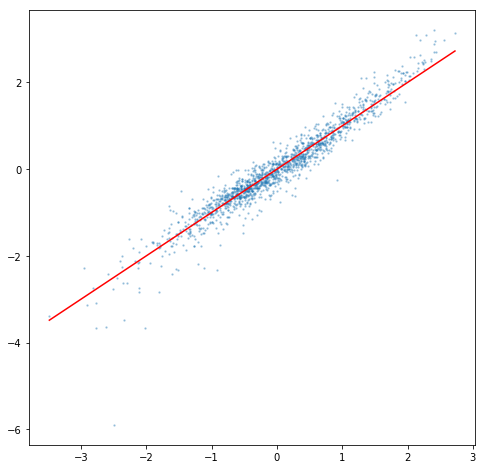

In [389]:
predictions = enet_model.predict(X_train_scaled)

plt.figure(figsize = (8,8))
plt.scatter(predictions, 
            y_train,
            s = 2,
            alpha = 0.3
           )

plt.plot([np.min(predictions), np.max(predictions)],
         [np.min(predictions), np.max(predictions)],
         zorder = 10,
         c = "r"
        );